In [1]:
from Quaternion_Polarization_module import *

#### 1. _State_ Class

You can initialize a polarization state using the class
 
 __"_State(alpha = 0, chi = 0)_"__, 
 
 where you need to specify the orientation angle "_alpha_"($\alpha$) and the ellipticity angle "_chi_"($\chi$) of the polarization ellipse related with the state of polarization you want to describe. THE ANGLES MUST BE GIVEN IN **DEGREES**
<center><img src="figures/polarization_ellipse.png" alt="Graphic of the Polarization ellipse and its respective main angles; the orientation angle 'alpha' and the ellipticity angle 'chi' " style="height: 400px; width:500px;"/></center>

In [2]:
#Create an Right Circular State of Polarization
RC = State(0, 45)
#Create an Left Circular State of Polarization
LC = State(0, -45)
#Create a Vertical Linear State of polarization
vertical = State(90,0)
#Create a Horizontal Linear State of polarization (by default)
horizontal = State()

# TODO: Displaying the State will retrieve its representation in the quaternion formalism
print(RC, LC, vertical, horizontal)

quaternion(1, 6.12323399573677e-17, 0, 1) quaternion(1, 6.12323399573677e-17, 0, -1) quaternion(1, -1, 1.22464679914735e-16, 0) quaternion(1, 1, 0, 0)


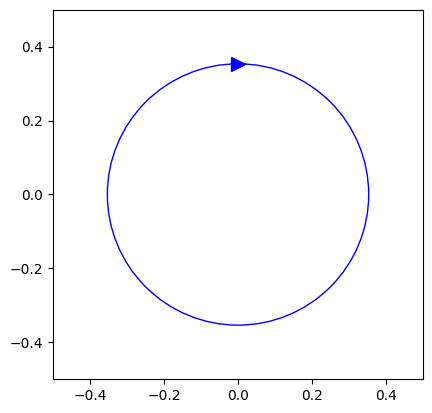

In [3]:
#You can graphic the ellipse of polarization associated with each State
RC.ellipse()

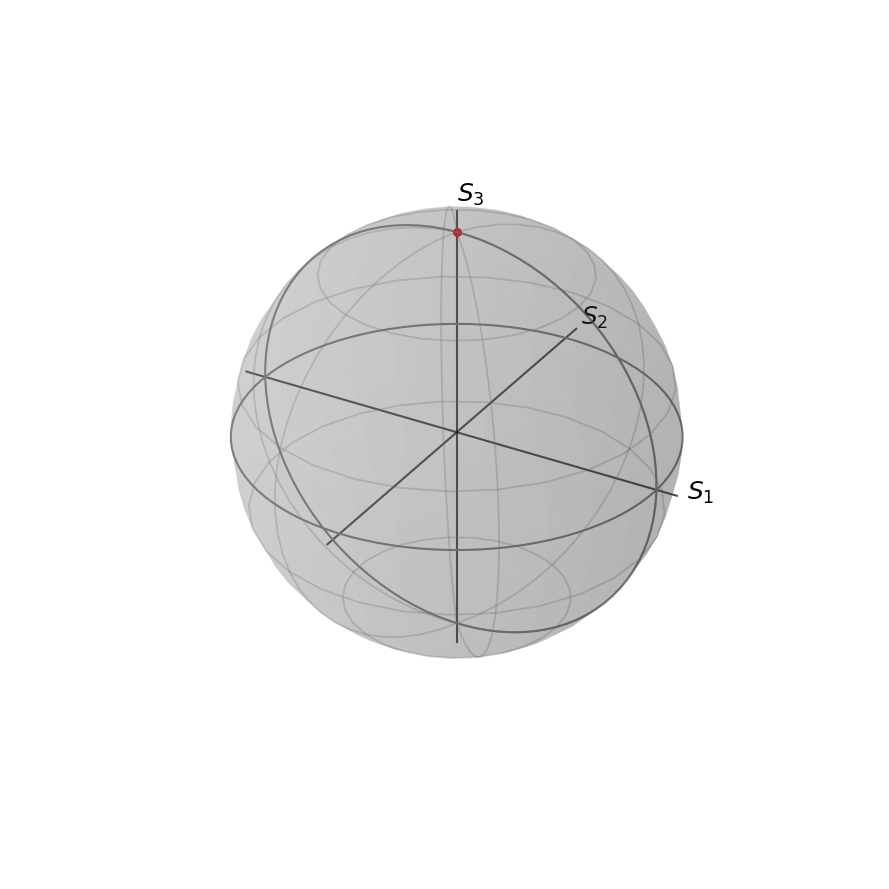

In [4]:
#and you can graphic the polarization state representation on the Poincaré Sphere
RC.Poincare_sphere()

#### 2. Waveplate Class and its Subclasses

You can initialize a Waveplate using the class

__"_Waveplate(phase_shift = 0, axis_angle = 0, eigenstate = (0,0))_"__,

where you need to specify the angle "*phase_shift* $ = \frac{2\pi}{\lambda}\Delta n l$" which is a property of the waveplate given by its birrefringence. The angle "*axis_angle*" is the orientation of the waveplate's eigenmodes withrespect the horizontal axis in the laboratory frame reference. Finally, the eigenstate is a tuple/list *"(alpha, chi)"*$(\alpha, \chi)$ that defines the waveplate's eigenstates, i.e. the polarization states that remain invariant under transformations due to the waveplate operator; you only need to specify a single state determined by the angles *(alpha, chi)*$(\alpha, \chi)$ since the waveplate only have two eigenstates and they are always orthogonal. THE ANGLES MUST BE GIVEN IN **DEGREES**

In [5]:
 #Create an arbitraty waveplate
arbitrary_wp = Waveplate(45, 0, (30,20))
 # When displaying the Waveplate object it retrieves its operator in the quaternion representation
arbitrary_wp

quaternion(0.923879532511287, 0.146576258418487, 0.253877526764165, 0.245984168756596)

##### 2.1 Half-waveplates and Quater-waveplates

There are two spetial kinds of waveplates, the Half-waveplates(Hwp) and the Quater-waveplate(Qwp):

a. The Hwp is a waveplate whose *__phase_shift__* is always $180°$ since introduces a retardance of half of a wavelenght on an electromagnetic wave. 

b. The Qwp is a waveplate whose *__phase_shift__* is always $90°$ since introduces a retardance of 1/4 of a wavelenght on an electromagnetic wave.

You can use the subclasses
 
 *__Hwp( axis_angle = 0, eigenstate =(0,0) )__* and *__Qwp( axis_angle = 0, eigenstate =(0,0) )__*,

to initialize a Hwp and a Qwp respectivelly.

In [6]:
# create a Hwp and a Qwp with the default args, i.e. a Hwp and a Qwp 
# with linear eigenstates and its eigenmodes aligned with the lab frame reference.
my_Hwp = Hwp()
my_Qwp = Qwp()
print(my_Hwp, my_Qwp)

quaternion(6.12323399573677e-17, 1, 0, 0) quaternion(0.707106781186548, 0.707106781186548, 0, 0)


##### 2.2 Composite Waveplate

A system consisting of the composition of multiple waveplates is called a Composite Waveplate(CW). The operator of a CW system is equivalent to the operator of another waveplate with a given phase-shift and eigenstates. To initialize a CW system we use the class 

*__Composite_waveplate( waveplates )__*

where the only argument __waveplates__ must be an ordered iterable (list, array or tuple) that contains waveplate objects. The order of its elements must be the same orden as in a experimental set-up, being the first element on the list the first waveplate that interacts with light.


In [7]:
#Creating an ordered iterable containing waveplate objects:
waveplates = [Waveplate(phase, angle) for phase, angle in zip((90,90,180),(0,30,60))] 
#Now we create a CW object with the waveplates
cw = Composite_waveplate(waveplates)
#When displaying the CW object it retrieves its operator in the quaternion representation as the equivalent waveplate
print(cw)

quaternion(6.12323399573677e-17, -0.5, 6.12323399573676e-17, 0.866025403784439)


Now, you can obtain the characterization of you CW object. That is, the angles associated with the equivalent waveplate; 

**General Characterization**: The equivalent phase_shift, and the angles (alpha, chi) of the equivalent eigenstate.


**Jones Theorem Characterization**: A CW is also equivalent to a composition of a waveplate with linear eigenstates and a waveplate with circular eigenstates; then you obtain the angle _phi_($\varphi$) of the circular waveplate *phase_shift*, the angle _delta_($\delta$) of the linear waveplate *phase_shift* and the orientation angle _alpha_($\alpha$) related with the linear waveplate's eigenstate.

<center><img src="figures/cwgeneral.png" alt="Graphic of the characterization of a Composite waveplate system. The General characterization and the Jones Theorem Characterization" style="height: 400px; width:700px;"/></center>

In [8]:
# To obtain the caracterization you use the 'caracterization' method from the Composite_waveplate class
waveplates = [Waveplate(phase, angle) for phase, angle in zip((90,90,180),(0,30,60))] 
cw = Composite_waveplate(waveplates)
cw.characterization()

{'Jones_Theorem': {'phi': 540.0, 'alpha_p': 225.0, 'delta': 60.00000000000001},
 'General_characterization': {'gamma': 180.0,
  'alpha': 90.0,
  'chi': 30.000000000000004}}

#### 3. Operators and States (Transformations)

Firstlly you can determine the transformation of a single State due to a single operator (waveplate) or a list of operators. You need to use the _operate_ method from State object.

**_your_state.operate( waveplate or list_of waveplates )_**

which returns the transformed polarization state as a another State object or a list of State objects
<center><img src="figures/operation_State.png" alt="Graphical representation of the 'operate' method " style="height: 400px; width:500px;"/></center>


In [9]:
# You can perform the transformation of a State object with a Waveplate object or a list/tuple of Waveplate objects
# using the State class method called "operate"

horizontal = State() #Horizontal state
list_of_wp = [Qwp(angle) for angle in (20,30,45)] #a list of waveplates objects
#This calculates the transformation of the state through different operators 
print(f'The transformed states through each wp is:\n {horizontal.operate(list_of_wp)}') 

#Another example: Calculating the transformation of a state due to a CW composed of the previous list of wp
cw = Composite_waveplate(list_of_wp)
#This calculates the transformation of the state through a CW
print(horizontal.operate(cw))


The transformed states through each wp is:
 [quaternion(1, 0.586871451200137, 0.492344306015867, -0.64279), quaternion(1, 0.248953724906932, 0.433605906273155, -0.86603), quaternion(1, 6.12323399573677e-17, 0, -1)]
quaternion(1, 0.261868242572616, -0.22001756164436, 0.93969)


On the other hand, with a waveplate object you can calculate the transformation of this object upon a single State object or a list/tuple of State Objects. You need to use the _operate_ method from Waveplate Class

**_your_waveplate.operate( State or list_of_States )_**

which returns the transformed polarization state as a State object or a list of State objects
<center><img src="figures/operation_Waveplate.png" alt="Graphical representation of the 'operate' method " style="height: 400px; width:500px;"/></center>

In [10]:
# The same can be done with the Waveplate Class and their subclasses
# You can perform the transformation of an Operator object to a state or a list of states

list_of_states = [State(alpha, chi) for alpha, chi in zip((20,30,45), (0,10,20))] #a list of waveplates objects
a_wp_object = Qwp(30)
#This calculates the transformation of the state through different operators 
print(f'The transformed states through a_wp_object is:\n {a_wp_object.operate(list_of_states)}') 


The transformed states through a_wp_object is:
 [quaternion(1, 0.469361960945397, 0.81407718873427, -0.34202), quaternion(1, 0.76604243740148, 0.64279, -0), quaternion(1, 0.888350135925558, 0.25323845600746, 0.38302)]


In [11]:
FTB(21.7, 15, 18.29).characterization()

{'Jones_Theorem': {'phi': -73.15970505797964,
  'alpha_p': -23.300189214872642,
  'delta': 59.999631742489015},
 'General_characterization': {'gamma': 91.87542020184792,
  'alpha': -5.010262950377729,
  'chi': 22.954146771588775}}